# Problem Statement

Car Data-
Here, we will apply k-means clustering for grouping the similar cars in one cluster

In [451]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows.

Get the data from here - https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [452]:
cars_df = pd.read_csv('auto-mpg.csv')
cars_df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [453]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [454]:
cars_df.shape

(398, 9)

**Descriptive analysis**

In [455]:

cars_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


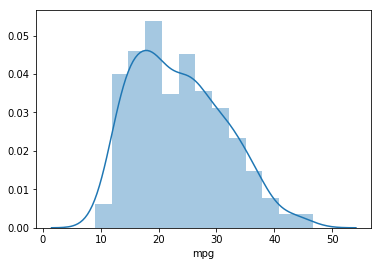

In [456]:
sns.distplot(cars_df['mpg'])

In [457]:
print("Skewness: %f" %cars_df['mpg'].skew())
print("Kurtosis: %f" %cars_df['mpg'].kurt())

Skewness: 0.457066
Kurtosis: -0.510781


# Q3 Check for missing value check, incorrect data and perform imputation with mean, median, mode as necessary.

In [458]:
#In the above question we find that 
cars_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

Here we can see that horsepower is of type object and not float and on keenly observing we can see that it contains ? in the data.

In [459]:
cars_df.horsepower.unique()



array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [460]:
#Imputing the values for horsepower.
#We use median for imputing so as to 
cars_df.loc[cars_df['horsepower']=="?",'horsepower']= np.nan


In [461]:
cars_df.horsepower.median()

93.5

In [462]:
cars_df['horsepower'] = cars_df['horsepower'].fillna(cars_df['horsepower'].median())
cars_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

In [463]:
cars_df['horsepower'] = pd.to_numeric(cars_df['horsepower'])

In [464]:
#factors = ['cylinders','displacement','horsepower','acceleration','weight','mpg']
#corrmat = data[factors].corr()
#f, ax = plt.subplots(figsize=(12, 9))
#sns.heatmap(corrmat, square=True);

cars_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


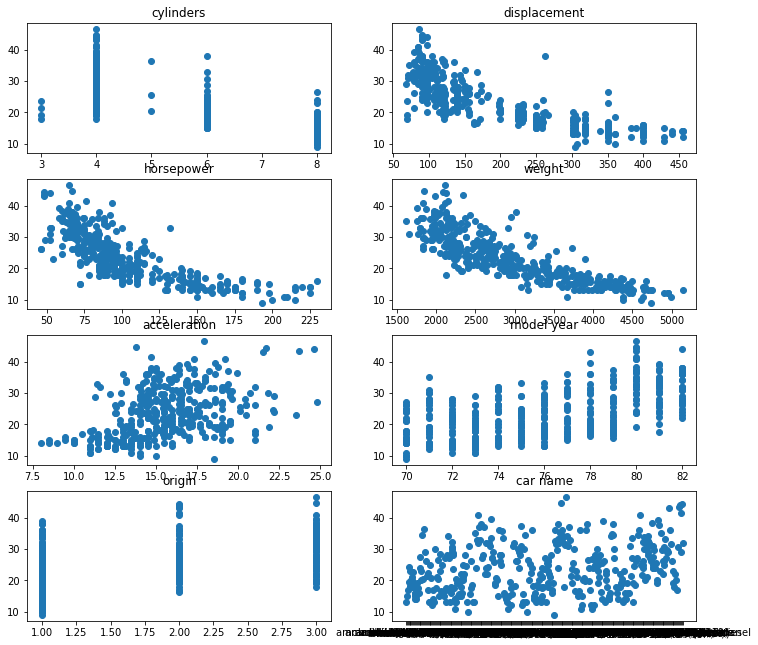

In [465]:


f,axarr = plt.subplots(4,2, figsize=(12,11))
mpgval = cars_df.mpg.values
#axarr[0,0].scatter(cars_df.cylinders.values, mpgval)
k=1
for i in [0,1,2,3]:
    for j in [0,1]:
        axarr[i,j].scatter(cars_df.iloc[:,k].values,mpgval)
        axarr[i,j].set_title(cars_df.columns[k])
        k=k+1

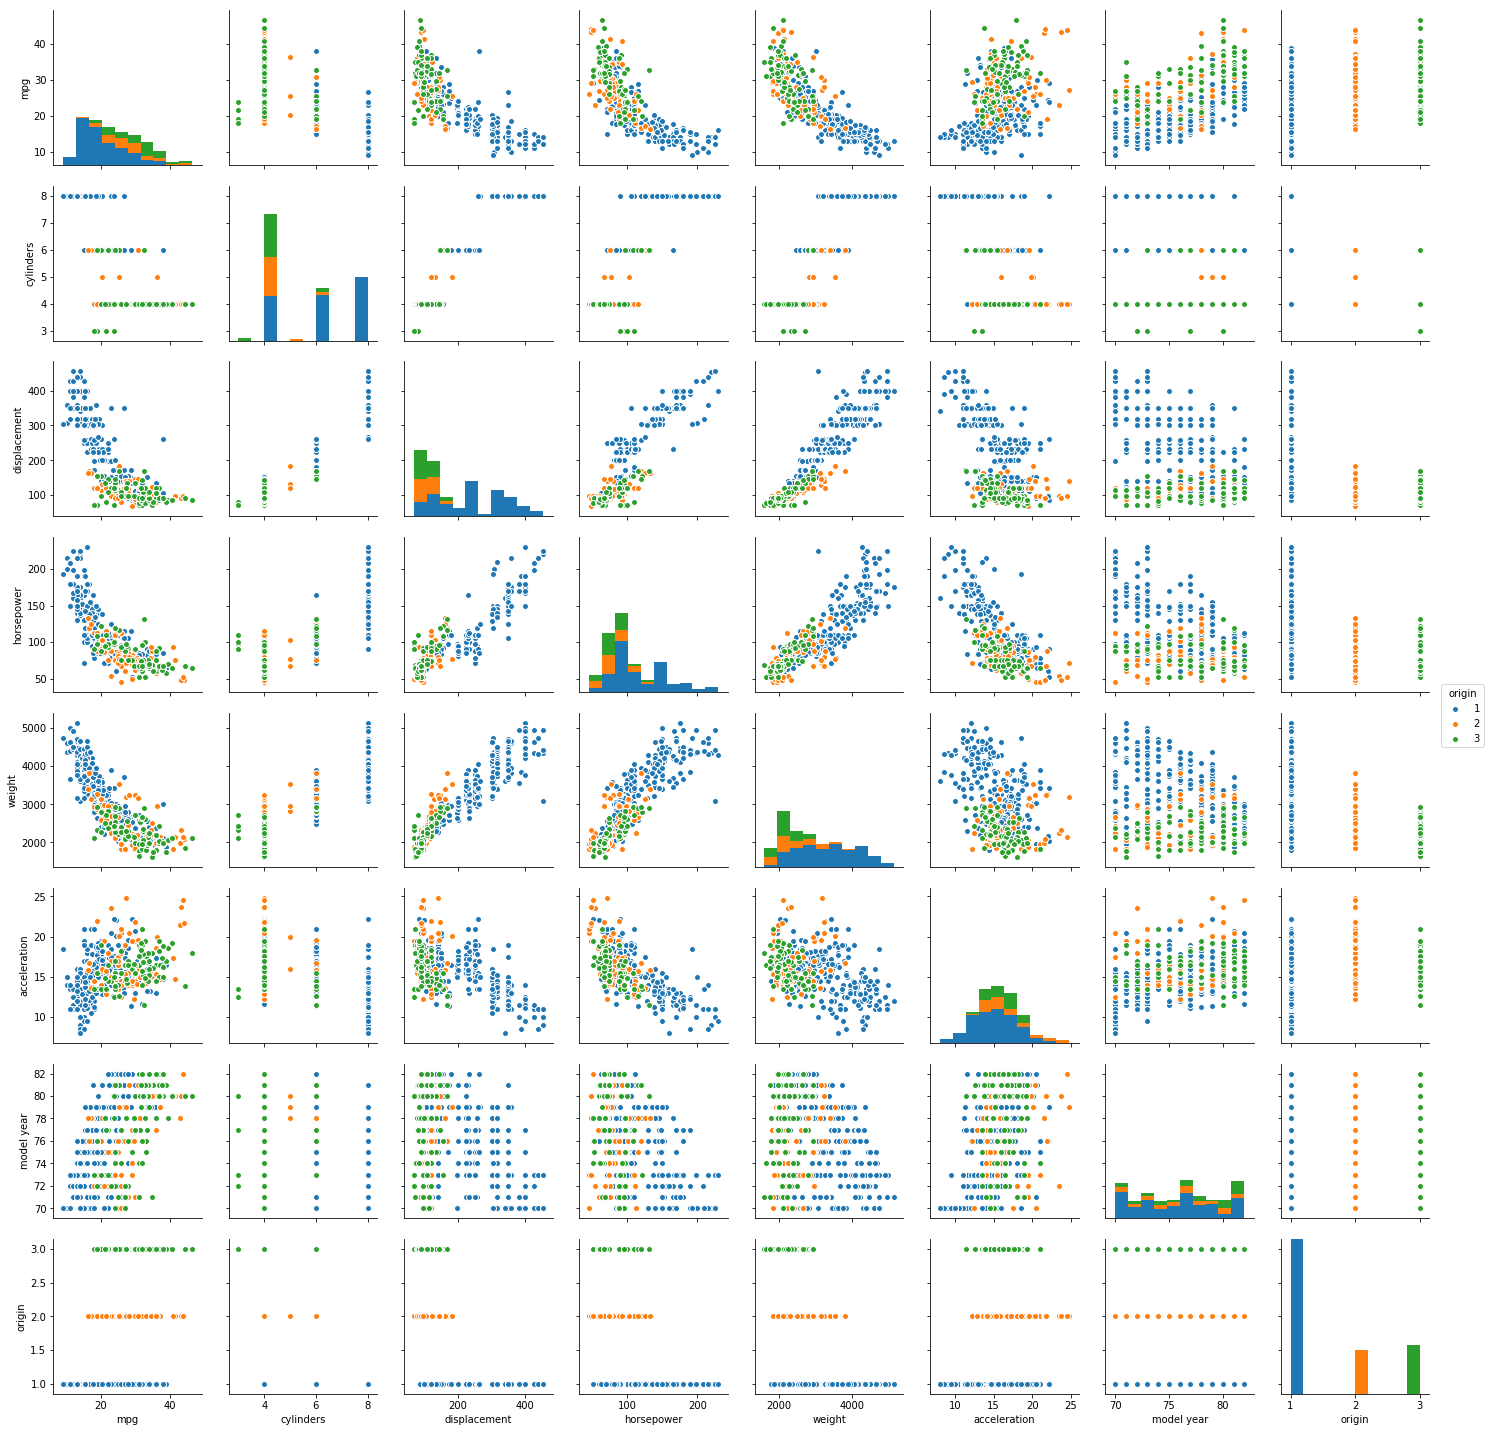

In [466]:
#multivariate analysis
sns.pairplot(cars_df, hue="origin")

#Observations

1. 4 cylinder has better mileage performance than other and most manufactured one.
2. 8 cylinder engines have low mileage count
3. 5 cylinder, performance wise, competes none neither 4 cylinder nor 6 cylinder.
4. Displacement, weight, horsepower are inversely related to mileage.
5. More horsepower means low mileage.
6. Year on Year the focus has been on increasing the mileage of the engines.
7. Cars manufactured in country 3 majorly focuses more on mileage.

# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [467]:
# Further dig into data shows max mpd is for 4 cylinders vehicles
# Origin as pointed earlier indicates production point so should be broken into dummy variables
# Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
         #subtract year from 83 to get the age
    

cars_df.head(10)



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [468]:
cars_df.drop('car name', axis=1, inplace = True)

In [469]:
country_code = pd.get_dummies(cars_df['origin'])
country_code.columns


Int64Index([1, 2, 3], dtype='int64')

In [470]:
cars_df['USA'] = country_code[1]
cars_df['Europe'] = country_code[2]
cars_df.drop('origin',axis=1, inplace=True)

**age of cars**

In [471]:
cars_df['age'] = 83 - cars_df['model year']
cars_df.drop('model year', axis = 1, inplace= True)

In [472]:
cars_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,USA,Europe,age
0,18.0,8,307.0,130.0,3504,12.0,1,0,13
1,15.0,8,350.0,165.0,3693,11.5,1,0,13
2,18.0,8,318.0,150.0,3436,11.0,1,0,13
3,16.0,8,304.0,150.0,3433,12.0,1,0,13
4,17.0,8,302.0,140.0,3449,10.5,1,0,13
5,15.0,8,429.0,198.0,4341,10.0,1,0,13
6,14.0,8,454.0,220.0,4354,9.0,1,0,13
7,14.0,8,440.0,215.0,4312,8.5,1,0,13
8,14.0,8,455.0,225.0,4425,10.0,1,0,13
9,15.0,8,390.0,190.0,3850,8.5,1,0,13


# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

In [473]:
# Missing value check was done above and hp column was treated with median values
# Let us check for outliers now



In [474]:
data_scaled = cars_df.apply(zscore)

In [475]:
data_scaled

,mpg,cylinders,displacement,horsepower,weight,acceleration,USA,Europe,age
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,0.773559,-0.461968,1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,0.773559,-0.461968,1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,0.773559,-0.461968,1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,0.773559,-0.461968,1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,0.773559,-0.461968,1.627426
5,-1.090751,1.498191,2.262118,2.454408,1.620492,-2.021656,0.773559,-0.461968,1.627426
6,-1.218855,1.498191,2.502182,3.030708,1.635863,-2.384735,0.773559,-0.461968,1.627426
7,-1.218855,1.498191,2.367746,2.899730,1.586204,-2.566274,0.773559,-0.461968,1.627426
8,-1.218855,1.498191,2.511784,3.161685,1.719809,-2.021656,0.773559,-0.461968,1.627426
9,-1.090751,1.498191,1.887617,2.244844,1.039961,-2.566274,0.773559,-0.461968,1.627426


We can compute outliers after we cluster the data

# Q7. Create appropriate clusters with the new data set

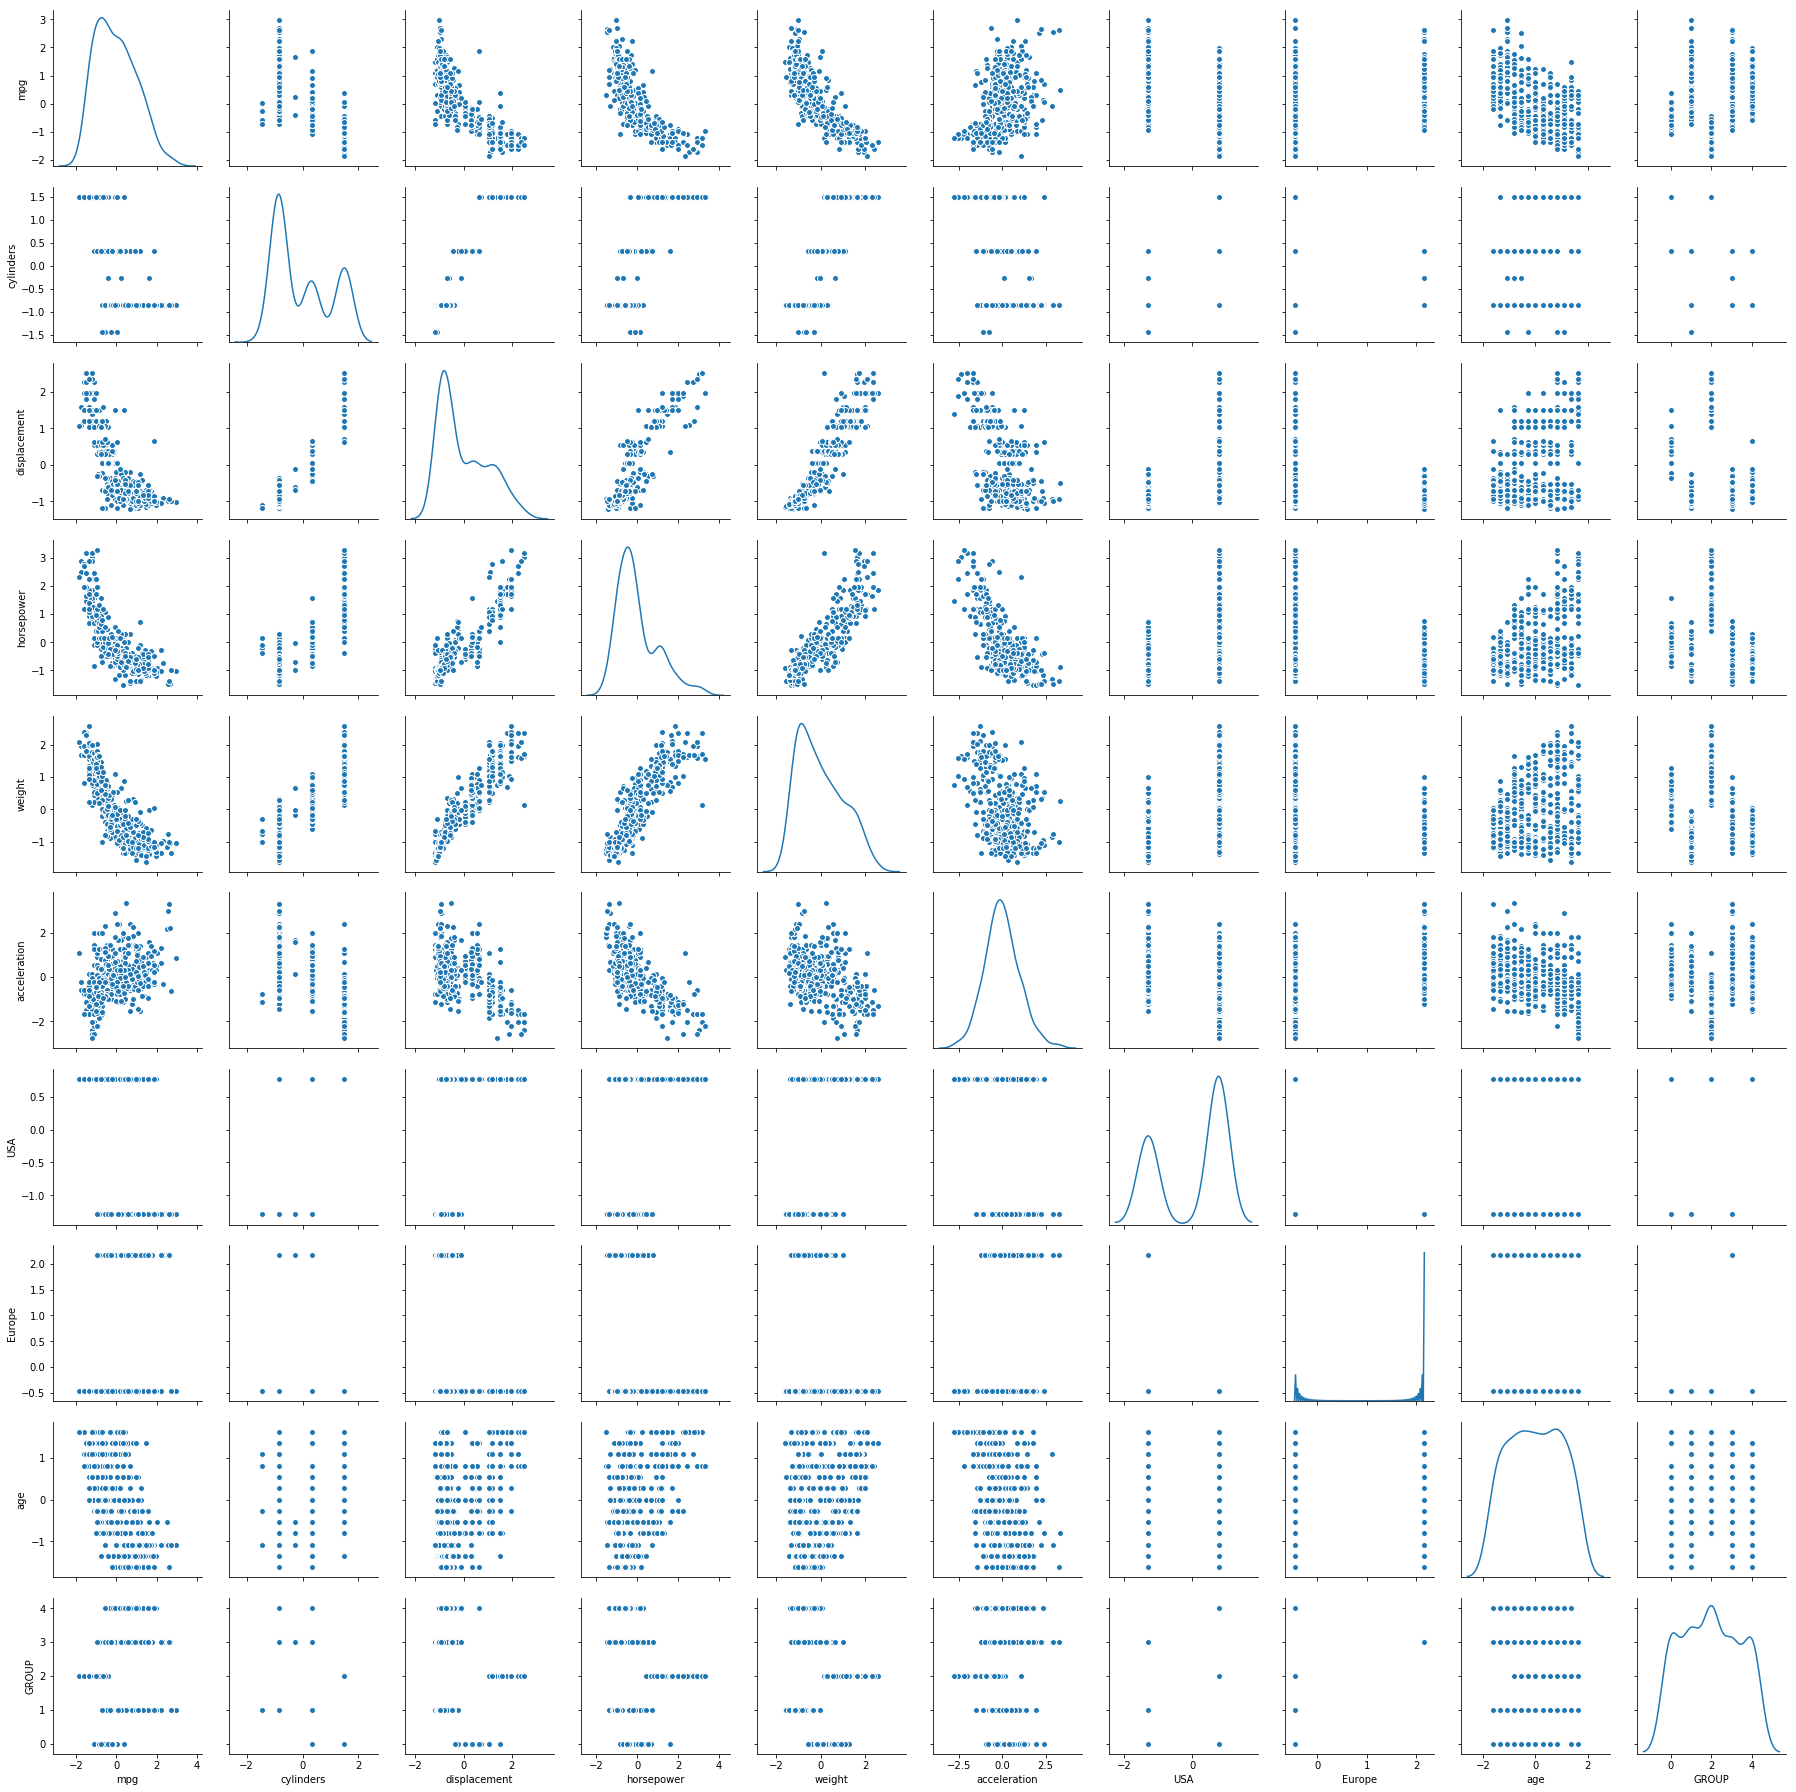

In [450]:
#analyse the input data
#plt.scatter(f1, f2, c='black', s=7)
sns.pairplot(data_scaled, diag_kind = 'kde')

Text(0.5,1,'Selecting k with the Elbow Method')

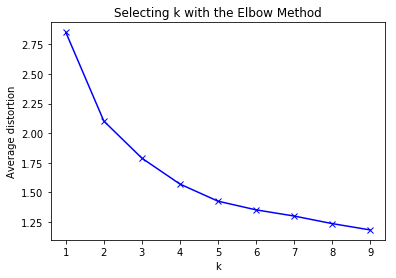

In [476]:
data_scaled_attributes = data_scaled
#tech_supp_attributes = tech_supp_df.apply(zscore)

#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k, random_state=1)
    model.fit(data_scaled_attributes)
    prediction=model.predict(data_scaled_attributes)
    meanDistortions.append(sum(np.min(cdist(data_scaled_attributes, model.cluster_centers_, 'euclidean'), axis=1)) / data_scaled_attributes.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

# Q8. Identify the appropriate clusters with result from above question

Looks like 3 clusters are going to make the error go down. So let's take K =3

# Q9. Check for no of values in each cluster and centers for each variables. 

In [477]:
cluster = KMeans( n_clusters = 3, random_state = 1 )
cluster.fit(data_scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [478]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.76622324, -0.81953132, -0.85831836, -0.65684693, -0.7965647 ,
         0.35550208, -1.29272617,  0.81486061, -0.17215998],
       [ 0.0155187 , -0.19889194, -0.15108995, -0.34255121, -0.14305901,
         0.33882822,  0.70647185, -0.46196822, -0.2364126 ],
       [-1.12726026,  1.4864187 ,  1.46865697,  1.47338845,  1.36736404,
        -1.03371846,  0.77355903, -0.46196822,  0.61198576]])

In [479]:
centroid_df = pd.DataFrame(centroids, columns = list(data_scaled) )
centroid_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,USA,Europe,age
0,0.766223,-0.819531,-0.858318,-0.656847,-0.796565,0.355502,-1.292726,0.814861,-0.172160
1,0.015519,-0.198892,-0.151090,-0.342551,-0.143059,0.338828,0.706472,-0.461968,-0.236413
2,-1.127260,1.486419,1.468657,1.473388,1.367364,-1.033718,0.773559,-0.461968,0.611986


In [480]:
prediction=cluster.predict(data_scaled)
data_scaled["GROUP"] = prediction # Creating a new column "GROUP" which will hold the cluster id of each record
data_scaled.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,USA,Europe,age,GROUP
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,0.773559,-0.461968,1.627426,2
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,0.773559,-0.461968,1.627426,2
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,0.773559,-0.461968,1.627426,2
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,0.773559,-0.461968,1.627426,2
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,0.773559,-0.461968,1.627426,2
5,-1.090751,1.498191,2.262118,2.454408,1.620492,-2.021656,0.773559,-0.461968,1.627426,2
6,-1.218855,1.498191,2.502182,3.030708,1.635863,-2.384735,0.773559,-0.461968,1.627426,2
7,-1.218855,1.498191,2.367746,2.899730,1.586204,-2.566274,0.773559,-0.461968,1.627426,2
8,-1.218855,1.498191,2.511784,3.161685,1.719809,-2.021656,0.773559,-0.461968,1.627426,2
9,-1.090751,1.498191,1.887617,2.244844,1.039961,-2.566274,0.773559,-0.461968,1.627426,2


# Q10. Assign the groups created above to data frame and study the characteristics  for each group.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a58ed5358>,
      dtype=object)

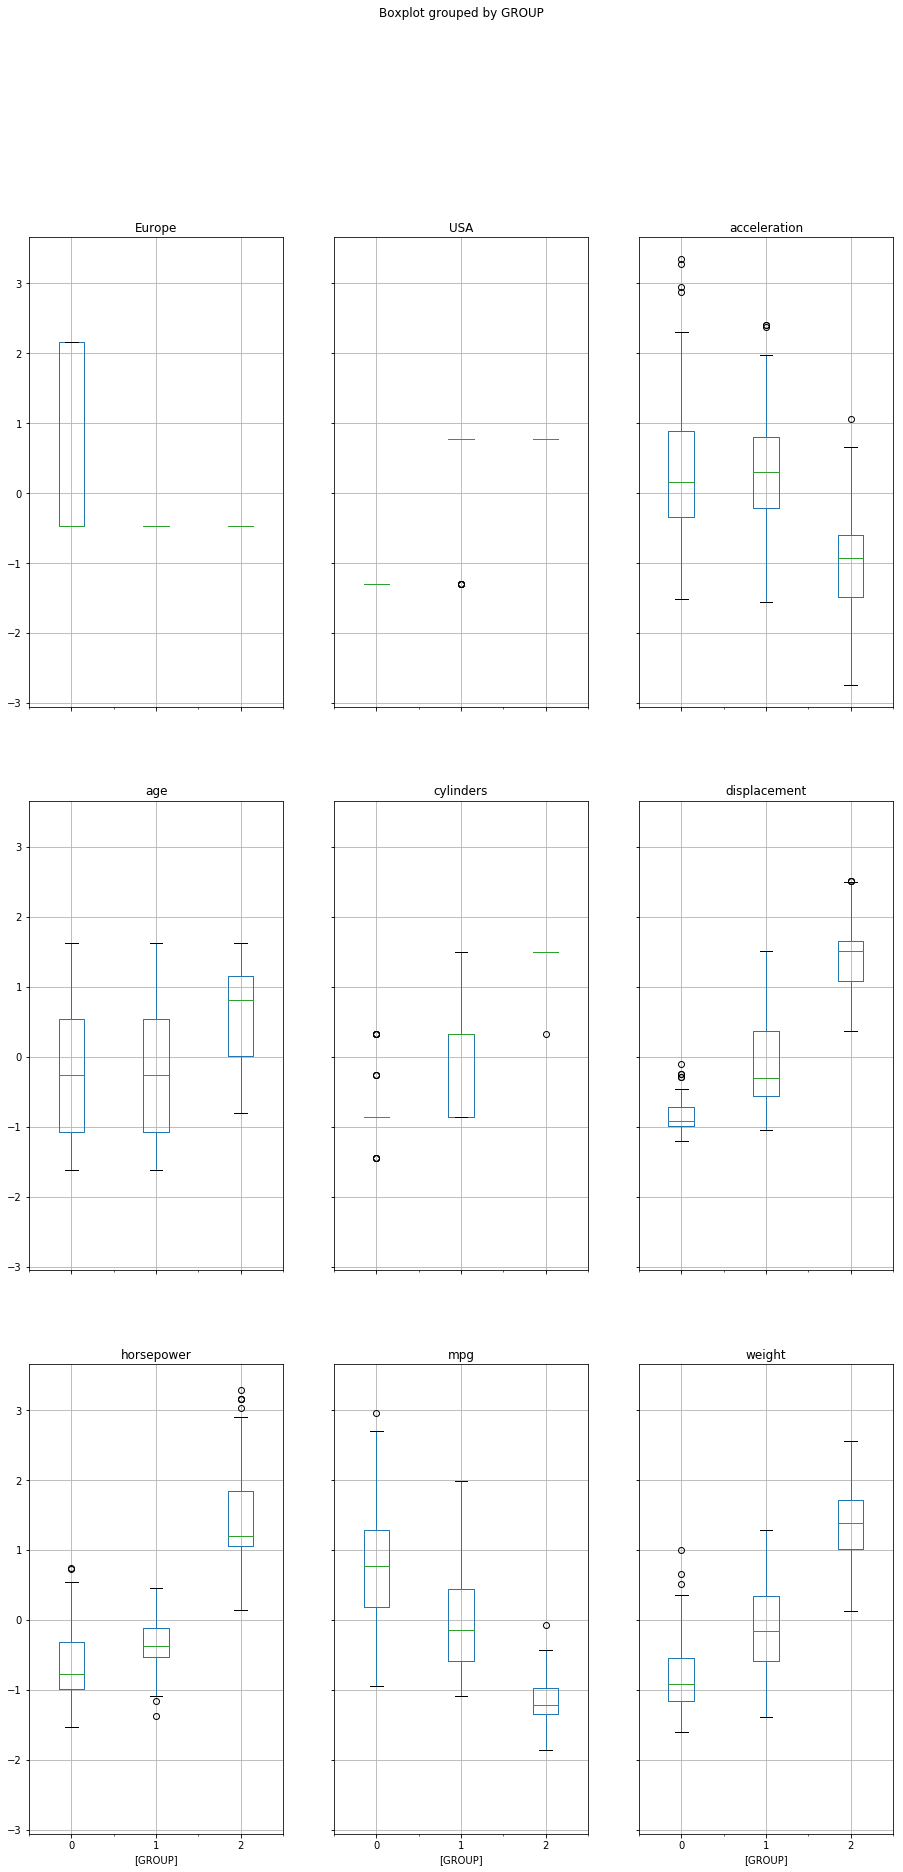

In [481]:

data_scaled.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 40))

In [482]:
cluster_range = range( 2, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10, random_state = 1)
  clusters.fit(data_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,cluster_errors,num_clusters
0,2001.098868,2
1,1422.291736,3
2,1148.935904,4
3,957.569675,5
4,877.890408,6
5,802.837771,7
6,728.349304,8
7,660.465482,9


In [ ]:
there is a good drop when clusters are 3 so we can have k as 3 and box plot also shows good distribution of clusters when we take 3 as K.

In [166]:
# Export the data into csv for any further analysis

from pandas import ExcelWriter
writer = ExcelWriter('d:\groups.xls')
cars_df.to_excel(writer,'Sheet1')
writer.save()

In [167]:
# We can try similar analysis for 3 grps as well to check if we get more clear distinction among groups